# Домашнее задание 1
## Вероятностные распределения
### Щербаков Игорь, СКБ 171
---

## 1.1 Выбор одного дискретного распределения и одного непрерывного распределения

a) Геометрическое распределение. Распределение обозначается $$\xi \sim  Geom(p)$$
Распределение Парето задается следующей функцией вероятности:
$$p_\xi(x)=P(\xi=x)=p(1-p)^{x}, x\in N \cup \{0\},0<p<1$$
$$p_i=p_\xi(x_i)$$

Функция распределения:

$$F_\xi(x)=\sum\limits_{i=0}^{x}p(i)=p+p(1-p)+p(1-p)^2+...+p(1-p)^x=(1-(1-p))(1+(1-p)+(1-p)^2+...+(1-p)^x)$$

$$F_\xi(x)=1-(1-p)^{x+1}$$

Распределение имеет параметр p - вероятность успеха

б) Распределение Парето. 
Распределение обозначается $$\xi \sim  P(\alpha, c_0)$$
Распределение Парето задается следующей функцией распределения и следующей плотностью распределения [1]:
$$F_\xi(x)=P\{\xi<x\}=1-\left(\dfrac{c_0}{x}\right)^\alpha, x>c_0$$
$$f_\xi(x)=\dfrac{\alpha}{c_0}\left(\dfrac{c_0}{x}\right)^{\alpha+1}, \ x>c_0$$
Распределение имеет два параметра $\alpha, \alpha>0$ и $c_0$

$с_0$ - коэффициент масштаба
$\alpha$ - коэффициент формы

## 1.2 Описание основных характеристик распределения

а) Выведем матожидание геометрического распределения:

$E\xi=\sum\limits_{i=1}^{\infty}i p_i=\sum\limits_{i=1}^{\infty}ip(1-p)^{i}=\dfrac{1-p}{p}$

Выведем дисперсию геометрического распределения:

$E\xi^2=\sum\limits_{i=1}^{\infty}i^2 p_i=\sum\limits_{i=1}^{\infty}i^2p(1-p)^{i}=\dfrac{2-3p+p^2}{p^2}$

$D\xi=E\xi^2-(E\xi)^2=\dfrac{1-p}{p^2}$

Функция дискретная, неотрицательная. Производящая функция:

$G(z)=\sum\limits_{x=0}^{\infty}p_x z^x=\sum\limits_{x=0}^{\infty} p(1-p)^x z^x=\dfrac{p}{1-(1-p)z}$

Производящая функция моментов:

$\phi_x(z)=\sum\limits_{j=0}^{\infty}e^{j z}p_j=\dfrac{p}{1-(1-p)e^{z}}$

(Гамма-функция дувх аргументов - неполная гамма-функция)

Характерестическая функция:

$g_x(z)=\sum\limits_{j=0}^{\infty}e^{i z j}p_j=\dfrac{p}{1-(1-p)e^{i z}}$

Гистограмма вероятностей

In [1]:
from matplotlib import pyplot as plt

def barplot(x_data, y_data, error_data, x_label="", y_label="", title=""):
    _, ax = plt.subplots()
    ax.bar(x_data, y_data, color = '#539caf', align = 'center', width=1)
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 2, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    
def geom_pmf(p, x):
    return p*(1-p)**x

def make_p_hist(n, p):
    x=[]
    y=[]
    for i in range(0,n+1):
        x+=[i]
        y+=[geom_pmf(p,i)]
    barplot(list(map(lambda t:t+0.5,x)),y,0, x_label="x", y_label="Вероятность", title="p="+str(p))
    
make_p_hist(10, 0.6)

График функции распределения:

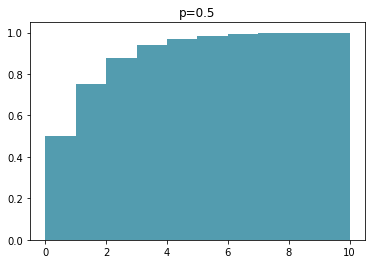

In [2]:
import numpy as np
from matplotlib import pyplot as plt

def cdf(x,p):
    return 1-(1-p)**(x)
plotcdf=[]
for i in np.linspace(1,10,10):
    plotcdf+=[[i,cdf(i, 0.5)]]
data = np.array(plotcdf)
x, y = data.T
barplot(x-0.5,y,0, title="p="+str(0.5))

б) Выведем матожидание распределения Парето:

$E\xi=\int\limits_{c_0}^{+\infty}x f_\xi(x)dx=\int\limits_{c_0}^{+\infty}x \dfrac{\alpha c_0^\alpha}{x^{\alpha+1}}dx=\alpha c_0^\alpha\int\limits_{c_0}^{+\infty}\dfrac{1}{x^\alpha}dx = \alpha c_0^\alpha \dfrac{c_0^{1-\alpha}}{\alpha-1}=\dfrac{\alpha c_0}{\alpha-1}$, при условии $\alpha>1$

Выведем дисперсию распределения Парето:

$D\xi=E\xi^2-(E\xi)^2 \\ E\xi^2=\int\limits_{c_0}^{+\infty}x^2 \dfrac{\alpha c_0^\alpha}{x^{\alpha+1}}dx=\alpha c_0^\alpha\int\limits_{c_0}^{+\infty}\dfrac{1}{x^{\alpha-1}}dx=\dfrac{\alpha c_0^2}{\alpha-2} \text{, при } \alpha>2$

Тогда $D\xi=\dfrac{\alpha c_0^2}{(\alpha-1)^2(\alpha-2)}$ 

Производящая функция моментов:

$\phi_x(z)=Ee^{zx}=\int\limits_{c_0}^{\infty}e^{zx}\dfrac{\alpha c_0^\alpha}{x^{\alpha+1}}dx=\alpha c_0^\alpha \int\limits_{c_0}^{\infty}x^{-\alpha-1}e^{zx}dx=\biggr\vert zx=-t\biggr\vert=\alpha c_0^\alpha \int\limits_{-z c_0}^{\infty}\left(\dfrac{-t}{z}\right)^{-\alpha-1}e^{-t}\dfrac{dt}{-z}=\alpha(-z c_0)^\alpha \Gamma(-\alpha,-z c_0), z<0$

(Гамма-функция дувх аргументов - неполная гамма-функция)

Характерестическая функция:

$g_x(z)=Ee^{zxi}=\int\limits_{c_0}^{\infty}e^{zxi}\dfrac{\alpha c_0^\alpha}{x^{\alpha+1}}dx=\alpha c_0^\alpha \int\limits_{c_0}^{\infty}x^{-\alpha-1}e^{zxi}dx=\biggr\vert zxi=-t\biggr\vert=\alpha c_0^\alpha \int\limits_{-i z c_0}^{\infty}\left(\dfrac{-t}{zi}\right)^{-\alpha-1}e^{-t}\dfrac{dt}{-zi}=\alpha(-z i c_0)^\alpha \Gamma(-\alpha,- i z c_0)$

График плотности вероятности:

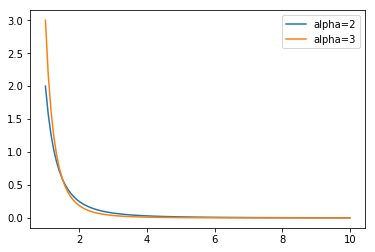

In [29]:
import numpy as np
from matplotlib import pyplot as plt

def pdf(x, alpha=2, c0=1): # alpha = 2 и 3 , c0 = 1
    return alpha/c0*(c0/x)**(alpha+1)

plotpdf=[]
for i in np.linspace(1,10,110):
    plotpdf+=[[i,pdf(i), pdf(i, alpha=3)]]
plotpdf=plotpdf
data = np.array(plotpdf)
x, y, z = data.T
plt.plot(x,y,label='alpha=2')
plt.plot(x,z,label='alpha=3')
plt.legend()
plt.show()

График функции распределения:

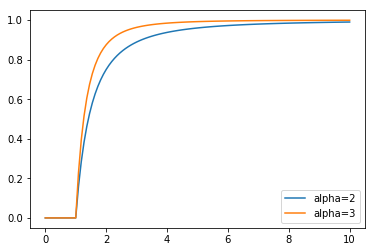

In [18]:
import numpy as np
from matplotlib import pyplot as plt

def cdf(x, alpha=2, c0=1): # alpha = 2 и 3 , c0 = 1
    return 1-(c0/x)**alpha
plotcdf=[]
for i in np.linspace(1,10,100):
    plotcdf+=[[i,cdf(i),cdf(i, alpha=3)]]
plotcdf=[[0, 0,0]]+plotcdf
data = np.array(plotcdf)
x, y, z = data.T
plt.plot(x,y,label='alpha=2')
plt.plot(x,z,label='alpha=3')
plt.legend()
plt.show()


## 1.3 Поиск примеров событий, которые могут быть описаны выбранными случайными величинами

a) В общем случае геометрическое распределение описывает распределение дискретной случайной величины, равной количеству испытаний случайного эксперимента с двумя возможными резултатами ("успех" и "неуспех") до наблюдения первого успеха. 


Типичной интерпретацией геометрического распределения является эксперимент с подбрасыванием монетки. Вероятность события 
A = {первый раз мы первый раз получим "орла" после i "неуспешных" бросков ("решки")}: P(A) = $0.5\cdot0.5^i$. Здесь параметр p - вероятность выбросить "орла".

Нетипичной интерпретацией геометричесого распределения является такая ситуация. Предположим мы посылаем биты некого сообщения до первой ошибки. Пусть вероятность ошибки p=0.05. Тогда ошибки распределены геометрически. В таком случае мы можем говорить, что средний размер переданных сообщений, состоящих из правильных битов будет стремиться к мат. ожиданию геометрического распределения с параметром p. Т.е. $\dfrac{0.95}{0.05}=19$  

б) В общем случае распределение Парето описывает связь места (ранга) в упорядоченном "рейтинге" величин и частоты, с которой встречаются эти величины.

Примером интерпретации распределения Парето можно считать закон лингвистики, известный как Закон Ципфа. Если все слова языка (или просто достаточно длинного текста) упорядочить по убыванию частоты их использования, то частота n-го слова в таком списке окажется приблизительно обратно пропорциональной его порядковому номеру x (рангу слова). Эта связь описывается распределением Парето [3].

Другим примером интерпретации распределения Парето может являться распределение числа жителей в населенных пунктах крупнее определенного размера в некоторой стране. Покажем это на примере 40 крупнейших городов Германии.
Нормируем размер городов по населению крупнейшего, Берлина. Ниже приведены значение для первых 5 городов, упорядоченных по-убыванию.
Т.к. мы произвольно выбрали способ нормировки, добавим еще один пармаетр - нормировку по y и функции плотности вероятности Парето (параметр flt).
Используя возможности библиотеки SciPy, подберем оптимальные параметры так, чтобы получить минимальное СКО функции от реальных данных. Параметр $c_0$ оставим равным 1 по его смыслу как коэффициент масштаба. 

In [19]:
import pandas as pd
from scipy.optimize import curve_fit
pdata=pd.read_csv("German1.csv")
pdata.head()

,Rating,Population
0,1,1.00
1,2,0.51
2,3,0.41
3,4,0.30
4,5,0.21


In [20]:
def pdf(x, alpha=2, c0=1):
    return alpha/c0*(c0/x)**(alpha+1)

def pdf_flt(x, alpha, c0, flt):
    return pdf(x, alpha, c0)/flt
    
x=pdata["Rating"].values
y=pdata["Population"].values
popt, pcov = curve_fit(pdf_flt, x, y,bounds=([0,0.99,0], [3, 1, 100])) #Подбор параметров для минимального СКО
popt #Параметры

array([1.65135301e-06, 9.99241407e-01, 1.52750299e-06])

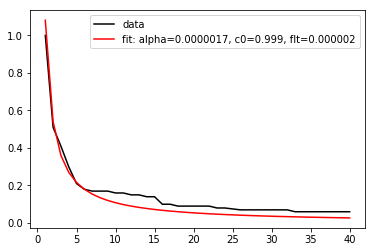

In [21]:
plt.plot(x, y, 'b-', label='data', color="black")
plt.plot(x, pdf_flt(x, *popt), 'r-', label='fit: alpha=%5.7f, c0=%5.3f, flt=%5.6f' % tuple(popt))
plt.legend()
plt.show()

Получили, что можно сказать, что распределение населения 40 крупнейших городов Германии очень близко к распределению Парето с параметрами $\alpha=1.65\cdot10^{-6}\text{ и }c_0=1$.

## 1.4 Описание способа моделирования выбранных случайных величин

a) Для выбраной величины известно явно заданная функция вероятности $p_\xi(x)=p(1-p)^{x}, x\in N \cup \{0\},0<p<1$:

Разобьем полуинтервал $[0, 1)$ на полуинтервалы $[0,p_1),[p_1,p1+p_2),[p_1+p_2,p_1+p_2+p_3), \ldots$ 

Тогда длинна $i$-того отрезка будет пропорциональна вероятности получить число i при генерации случайного числа из нашего распределения. Тогда, используя выборку из равномерного распределения на $[0,1)$ мы можем получить выборку чисел нашего распределения, наблюдая в какой из полуинтервалов "попадет" каждое значение. [4]


In [22]:
import random
def geom_pmf(x, p):
    return p*(1-p)**x

def generate_geom_sample(p = 0.5, sample_size = 100):
    res = []
    for i in range(sample_size):
        number=0;
        length=0;
        x=random.uniform(0,1) # [2]
        while(x>=length+geom_pmf(number, p)):
            length+=geom_pmf(number, p)
            number+=1
        res+=[number]
    return res
sample = generate_geom_sample(0.5, 1000) #p=0.5
sample[0:20]

[5, 1, 0, 0, 0, 0, 0, 3, 1, 2, 0, 1, 0, 0, 0, 0, 3, 1, 1, 0]

Построим график эмпирической функции распределения для проверки

In [23]:
import numpy as np
from matplotlib import pyplot as plt
geom_test=[]
for i in np.linspace(1,10,10):
    geom_test+=[[i ,len([1 for t in sample if t<i])/1000]]

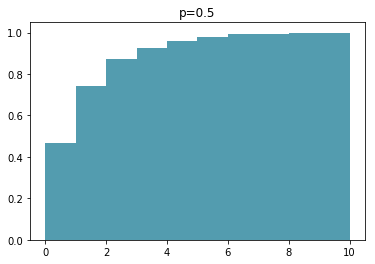

In [30]:
def barplot(x_data, y_data, error_data, x_label="", y_label="", title="p=0.5"):
    _, ax = plt.subplots()
    ax.bar(x_data, y_data, color = '#539caf', align = 'center', width=1)
    ax.errorbar(x_data, y_data, yerr = error_data, color = '#297083', ls = 'none', lw = 4, capthick = 2)
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)

data = np.array(geom_test) 
x, y = data.T
barplot(list(map(lambda t:t-0.5,x)),y,0)

б) Для выбраной величины известна явно заднанная функция распределения $F_\xi(x)=1-\left(\dfrac{c_0}{x}\right)^\alpha, x>c_0$

Возьмем выборку $u_1, u_2, ..., u_n \sim R(0,1)$

$P(u_i<t)=t, \forall t \in [0,1)$

$P(F_\xi^{-1}(u_i)<x)=P(u_i<F_\xi(x))=F(x)$, таким образом мы можем моделировать случайную величину применяя $F_\xi^{-1}(x)$ к выборке $u_i$

In [25]:
import random
def inverse_pareto_cdf(y, alpha, c0):
    return c0/((1-y))**(1/alpha)
def generate_pareto_sample(alpha, c0 = 1, sample_size = 10):
        result=[]
        for i in range(sample_size):
            x=random.uniform(0,1)  
            result+=[inverse_pareto_cdf(x, alpha, c0)]
        return result
sample = generate_pareto_sample(2,1,1000) # alpha = 2 , c0 = 1
sample[:10]

[1.0905878566628746,
 1.5210005248918046,
 1.1924242356603958,
 3.966558509255586,
 3.1287897589300036,
 1.9309412090664406,
 1.9074376584494426,
 1.0009667870730607,
 1.1055819161632672,
 2.4517419516925885]

Построим график эмпирической функции распределения для проверки

In [26]:
pareto_test=[]
for i in np.linspace(0,10,110):
    pareto_test+=[[i ,len([1 for t in sample if t<i])/1000]]

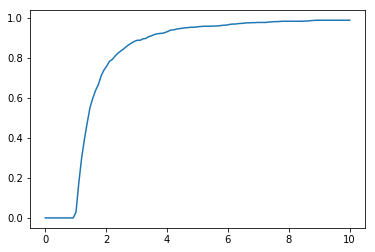

In [27]:
import numpy as np
from matplotlib import pyplot as plt

data = np.array(pareto_test) 
x, y = data.T
plt.plot(x,y)
plt.show()

## Источники
1. Айвазян С. А. и др. Прикладная статистика: Основы моделирования и первичная обработка данных. Справочное изд. / С. А. Айвазян, И. С. Енюков, Л. Д. Мешалкин. — М.: Финансы и статистика, 1983, С. 185-186
3. SciPy.org https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.uniform.html
3. Закон Ципфа // Википедия URL: https://ru.wikipedia.org/wiki/%D0%97%D0%B0%D0%BA%D0%BE%D0%BD_%D0%A6%D0%B8%D0%BF%D1%84%D0%B0 (дата обращения: 18.10.2019).
2. Зорин А. В., Зорин В. А., Федоткин М. А. МОДЕЛИРОВАНИЕ СЛУЧАЙНЫХ ВЕЛИЧИН И ПРОВЕРКА ГИПОТЕЗ О ВИДЕ РАСПРЕДЕЛЕНИЯ: Учебно-методическое пособие. — Нижний Новгород: Нижегородский госуниверситет, 2017